In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#label of data
print("""Name of selected of data:
=====================================
stations_yearstart_yearend_source
=====================================
Stations:
ansongo: a
kandadji: k
niamey: n
=====================================
Years:
1981
2000
2010
2020
=====================================
Source:
M. Bernard (AGHRYMET): be
M. Hamatan (AGHRYMET): ha
M. Bachir (ABN): ba
=====================================""")

Name of selected of data:
stations_yearstart_yearend_source
Stations:
ansongo: a
kandadji: k
niamey: n
Years:
1981
2000
2010
2020
Source:
M. Bernard (AGHRYMET): be
M. Hamatan (AGHRYMET): ha
M. Bachir (ABN): ba


# Selection between data sources

In [3]:
#set periode of study
start_date = '1981-06-01'
end_date = '2010-12-31'

#set all the dates ranging from start to end date
all_dates = pd.date_range(start=start_date, end=end_date)

## Ansongo

In [4]:
#load data Ansongo
a_1981_2016_be = pd.read_csv('./hydro_data/csv/a_1981_2016_be.csv')
a_1981_2010_ha = pd.read_csv('./hydro_data/csv/a_1981_2010_ha.csv')
a_1980_2010_ba = pd.read_csv('./hydro_data/csv/a_1980_2010_ba.csv')

In [5]:
#define datetime of data
a_1981_2016_be['Date'] = pd.to_datetime(a_1981_2016_be['Date'], infer_datetime_format=True) 
a_1981_2010_ha['Date'] = pd.to_datetime(a_1981_2010_ha['Date'], infer_datetime_format=True)
a_1980_2010_ba['Date'] = pd.to_datetime(a_1980_2010_ba['Date'], infer_datetime_format=True)

In [6]:
#cut data to periode of study
a_be = a_1981_2016_be.loc[(a_1981_2016_be['Date'] >= start_date) & (a_1981_2016_be['Date'] <= end_date)]
a_ha = a_1981_2010_ha.loc[(a_1981_2010_ha['Date'] >= start_date) & (a_1981_2010_ha['Date'] <= end_date)]
a_ba = a_1980_2010_ba.loc[(a_1980_2010_ba['Date'] >= start_date) & (a_1980_2010_ba['Date'] <= end_date)]

In [7]:
#reset index of data
a_be = a_be.reset_index().drop('index', axis=1)
a_ha = a_ha.reset_index().drop('index', axis=1)
a_ba = a_ba.reset_index().drop('index', axis=1)

In [8]:
#compare ha and be
#calculate diff between discharge values at Ansongo
a_ha['Diff_ha_be'] = np.where(a_ha['Ansongo'] == a_be['Ansongo'], 0, a_ha['Ansongo'] - a_be['Ansongo'])

### Ansongo Hamatan - Bernard

<AxesSubplot:title={'center':'Ansongo Hamatan - Bernard'}, xlabel='Date'>

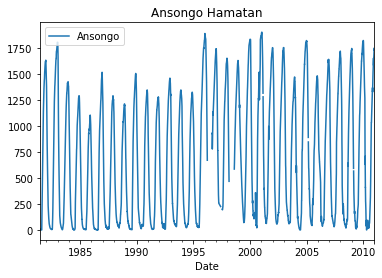

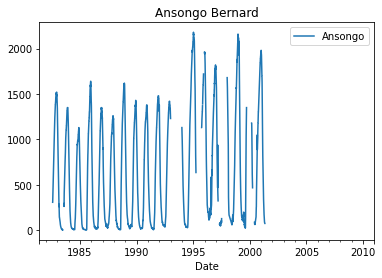

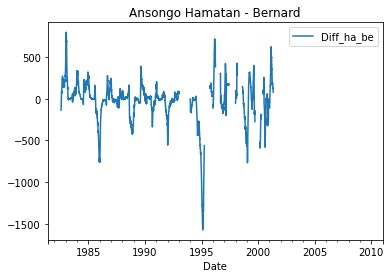

In [9]:
a_ha.plot(x='Date', y='Ansongo', title="Ansongo Hamatan")
a_be.plot(x='Date', y='Ansongo', title="Ansongo Bernard")
a_ha.plot(x='Date', y='Diff_ha_be', title="Ansongo Hamatan - Bernard")

### Ansongo Hamatan - Bachir

In [10]:
#delete double dates
a_ba = a_ba.drop_duplicates(subset=['Date'])

In [11]:
#add missing dates to data
a_ba = a_ba.set_index('Date').reindex(all_dates).rename_axis('Date').reset_index()

In [12]:
#convert ansongo column dtype from object to float
a_ba['Ansongo'] = pd.to_numeric(a_ba['Ansongo'], downcast='float')

In [13]:
#compare ha and ba
#calculate diff between discharge values at Ansongo
a_ha['Diff_ha_ba'] = np.where(a_ha['Ansongo'] == a_ba['Ansongo'], 0, a_ha['Ansongo'] - a_ba['Ansongo'])

<AxesSubplot:title={'center':'Ansongo Hamatan - Bachir'}, xlabel='Date'>

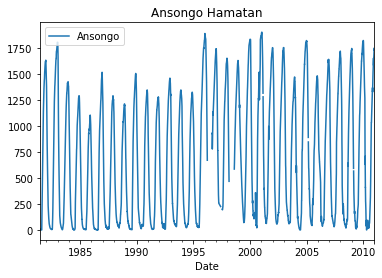

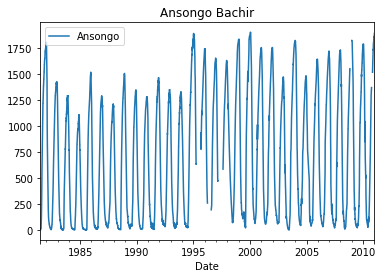

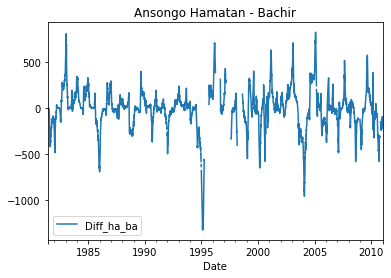

In [14]:
a_ha.plot(x='Date', y='Ansongo', title="Ansongo Hamatan")
a_ba.plot(x='Date', y='Ansongo', title="Ansongo Bachir")
a_ha.plot(x='Date', y='Diff_ha_ba', title="Ansongo Hamatan - Bachir")

### Ansongo Bernard - Bachir

In [15]:
#compare be and ba
#calculate diff between discharge values at Ansongo
a_be['Diff_be_ba'] = np.where(a_be['Ansongo'] == a_ba['Ansongo'], 0, a_be['Ansongo'] - a_ba['Ansongo'])

<AxesSubplot:title={'center':'Ansongo Bernard - Bachir'}, xlabel='Date'>

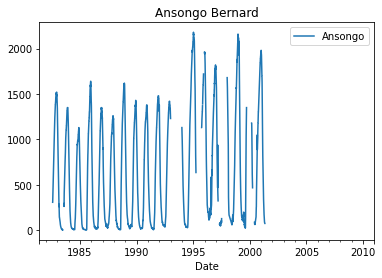

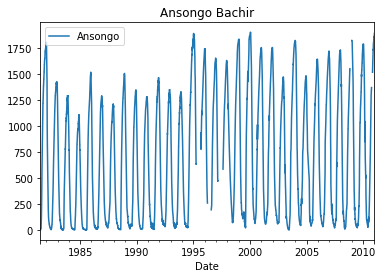

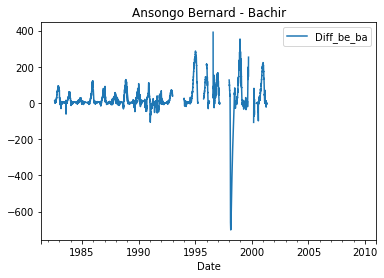

In [16]:
a_be.plot(x='Date', y='Ansongo', title="Ansongo Bernard")
a_ba.plot(x='Date', y='Ansongo', title="Ansongo Bachir")
a_be.plot(x='Date', y='Diff_be_ba', title="Ansongo Bernard - Bachir")

## Kandadji

In [17]:
#load data Kandadji
k_1981_2016_be = pd.read_csv('./hydro_data/csv/k_1981_2016_be.csv')
k_1981_2010_ha = pd.read_csv('./hydro_data/csv/k_1981_2010_ha.csv')
k_1980_2010_ba = pd.read_csv('./hydro_data/csv/k_1980_2010_ba.csv')

In [18]:
#define datetime of data
k_1981_2016_be['Date'] = pd.to_datetime(k_1981_2016_be['Date'], infer_datetime_format=True) 
k_1981_2010_ha['Date'] = pd.to_datetime(k_1981_2010_ha['Date'], infer_datetime_format=True)
k_1980_2010_ba['Date'] = pd.to_datetime(k_1980_2010_ba['Date'], infer_datetime_format=True)

In [19]:
#cut data to periode of study
k_be = k_1981_2016_be.loc[(k_1981_2016_be['Date'] >= start_date) & (k_1981_2016_be['Date'] <= end_date)]
k_ha = k_1981_2010_ha.loc[(k_1981_2010_ha['Date'] >= start_date) & (k_1981_2010_ha['Date'] <= end_date)]
k_ba = k_1980_2010_ba.loc[(k_1980_2010_ba['Date'] >= start_date) & (k_1980_2010_ba['Date'] <= end_date)]

In [20]:
#reset index of data
k_be = k_be.reset_index().drop('index', axis=1)
k_ha = k_ha.reset_index().drop('index', axis=1)
k_ba = k_ba.reset_index().drop('index', axis=1)

### Kandadji Hamatan - Bernard

In [21]:
#compare ha and be
#calculate diff between discharge values at Kandadji
k_ha['Diff_ha_be'] = np.where(k_ha['Kandadji'] == k_be['Kandadji'], 0, k_ha['Kandadji'] - k_be['Kandadji'])

<AxesSubplot:title={'center':'Kandadji Hamatan - Bernard'}, xlabel='Date'>

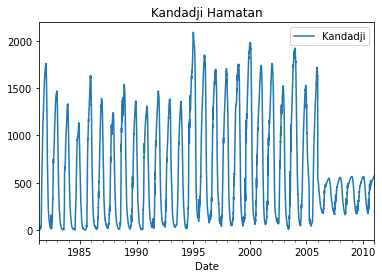

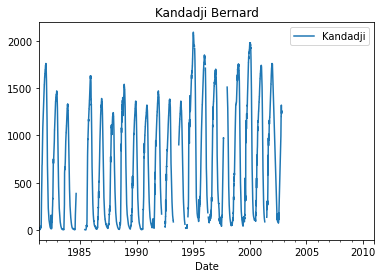

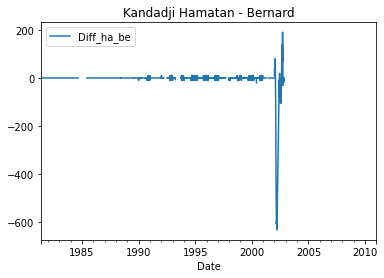

In [22]:
k_ha.plot(x='Date', y='Kandadji', title="Kandadji Hamatan")
k_be.plot(x='Date', y='Kandadji', title="Kandadji Bernard")
k_ha.plot(x='Date', y='Diff_ha_be', title="Kandadji Hamatan - Bernard")

### Kandadji Hamatan - Bachir

In [23]:
#delete double dates
k_ba = k_ba.drop_duplicates(subset=['Date'])

In [24]:
#add missing dates to data
k_ba = k_ba.set_index('Date').reindex(all_dates).rename_axis('Date').reset_index()

In [25]:
#convert ansongo column dtype from object to float
k_ba['Kandadji'] = pd.to_numeric(k_ba['Kandadji'], downcast='float')

In [26]:
#compare ha and ba
#calculate diff between discharge values at Ansongo
k_ha['Diff_ha_ba'] = np.where(k_ha['Kandadji'] == k_ba['Kandadji'], 0, k_ha['Kandadji'] - k_ba['Kandadji'])

<AxesSubplot:title={'center':'Kandadji Hamatan - Bachir'}, xlabel='Date'>

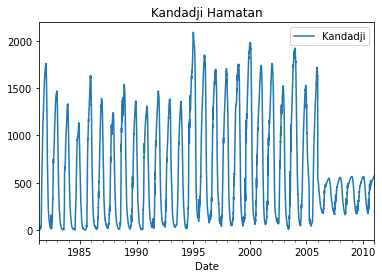

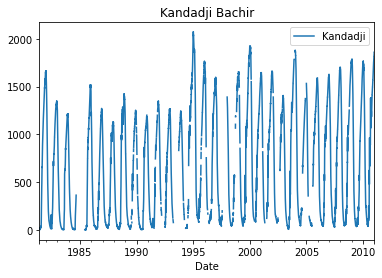

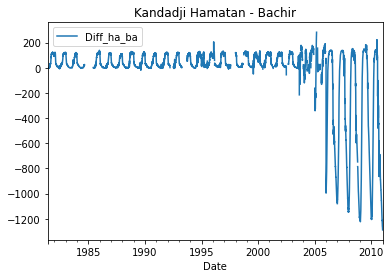

In [27]:
k_ha.plot(x='Date', y='Kandadji', title="Kandadji Hamatan")
k_ba.plot(x='Date', y='Kandadji', title="Kandadji Bachir")
k_ha.plot(x='Date', y='Diff_ha_ba', title="Kandadji Hamatan - Bachir")

### Kandadji Bernard - Bachir

In [28]:
#compare be and ba
#calculate diff between discharge values at Kandadji
k_be['Diff_be_ba'] = np.where(k_be['Kandadji'] == k_ba['Kandadji'], 0, k_be['Kandadji'] - k_ba['Kandadji'])

<AxesSubplot:title={'center':'Kandadji Bernard - Bachir'}, xlabel='Date'>

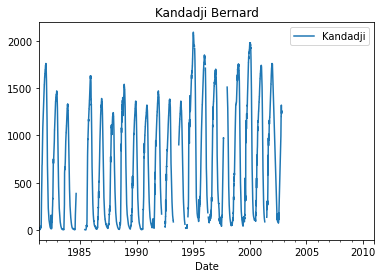

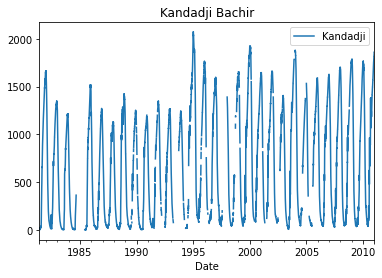

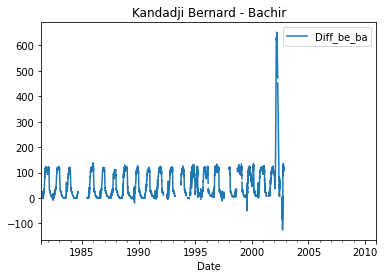

In [29]:
k_be.plot(x='Date', y='Kandadji', title="Kandadji Bernard")
k_ba.plot(x='Date', y='Kandadji', title="Kandadji Bachir")
k_be.plot(x='Date', y='Diff_be_ba', title="Kandadji Bernard - Bachir")

## Niamey

In [30]:
#load data Niamey
n_1981_2016_be = pd.read_csv('./hydro_data/csv/n_1981_2016_be.csv')
n_1981_2010_ha = pd.read_csv('./hydro_data/csv/n_1981_2010_ha.csv')
n_1980_2010_ba = pd.read_csv('./hydro_data/csv/n_1980_2010_ba.csv')

In [31]:
#define datetime of data
n_1981_2016_be['Date'] = pd.to_datetime(n_1981_2016_be['Date'], infer_datetime_format=True) 
n_1981_2010_ha['Date'] = pd.to_datetime(n_1981_2010_ha['Date'], infer_datetime_format=True)
n_1980_2010_ba['Date'] = pd.to_datetime(n_1980_2010_ba['Date'], infer_datetime_format=True)

In [32]:
#cut data to periode of study
n_be = n_1981_2016_be.loc[(n_1981_2016_be['Date'] >= start_date) & (n_1981_2016_be['Date'] <= end_date)]
n_ha = n_1981_2010_ha.loc[(n_1981_2010_ha['Date'] >= start_date) & (n_1981_2010_ha['Date'] <= end_date)]
n_ba = n_1980_2010_ba.loc[(n_1980_2010_ba['Date'] >= start_date) & (n_1980_2010_ba['Date'] <= end_date)]

In [33]:
#reset index of data
n_be = n_be.reset_index().drop('index', axis=1)
n_ha = n_ha.reset_index().drop('index', axis=1)
n_ba = n_ba.reset_index().drop('index', axis=1)

### Niamey Hamatan - Bernard

In [34]:
#compare ha and be
#calculate diff between discharge values at Niamey
n_ha['Diff_ha_be'] = np.where(n_ha['Niamey'] == n_be['Niamey'], 0, n_ha['Niamey'] - n_be['Niamey'])

<AxesSubplot:title={'center':'Niamey Hamatan - Bernard'}, xlabel='Date'>

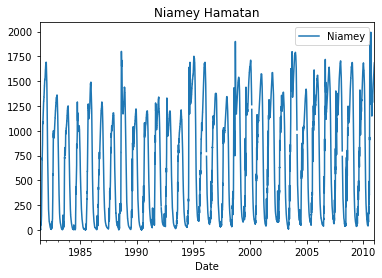

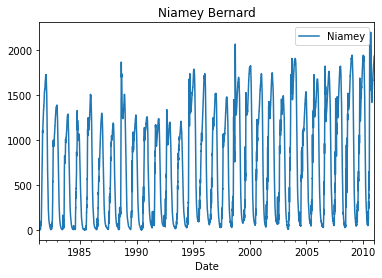

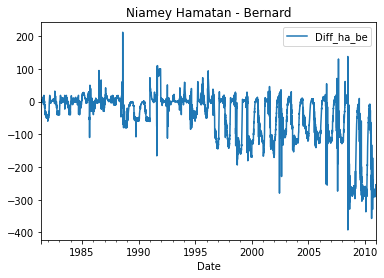

In [35]:
n_ha.plot(x='Date', y='Niamey', title="Niamey Hamatan")
n_be.plot(x='Date', y='Niamey', title="Niamey Bernard")
n_ha.plot(x='Date', y='Diff_ha_be', title="Niamey Hamatan - Bernard")

### Niamey Hamatan - Bachir

In [36]:
#delete double dates
n_ba = n_ba.drop_duplicates(subset=['Date'])

In [37]:
#add missing dates to data
n_ba = n_ba.set_index('Date').reindex(all_dates).rename_axis('Date').reset_index()

In [38]:
#convert ansongo column dtype from object to float
n_ba['Niamey'] = pd.to_numeric(n_ba['Niamey'], downcast='float')

In [39]:
#compare ha and ba
#calculate diff between discharge values at Ansongo
n_ha['Diff_ha_ba'] = np.where(n_ha['Niamey'] == n_ba['Niamey'], 0, n_ha['Niamey'] - n_ba['Niamey'])

<AxesSubplot:title={'center':'Niamey Hamatan - Bachir'}, xlabel='Date'>

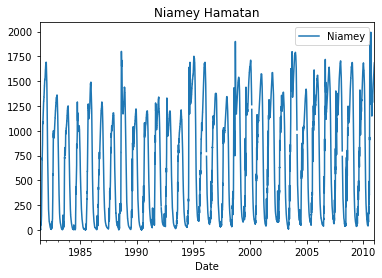

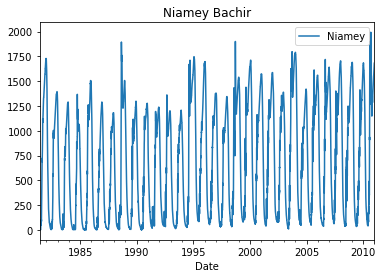

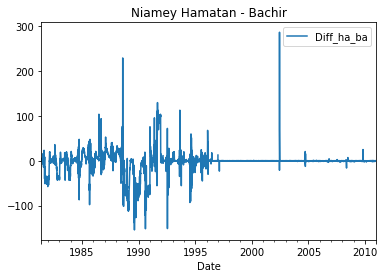

In [40]:
n_ha.plot(x='Date', y='Niamey', title="Niamey Hamatan")
n_ba.plot(x='Date', y='Niamey', title="Niamey Bachir")
n_ha.plot(x='Date', y='Diff_ha_ba', title="Niamey Hamatan - Bachir")

### Niamey Bernard - Bachir

In [41]:
#compare be and ba
#calculate diff between discharge values at Kandadji
n_be['Diff_be_ba'] = np.where(n_be['Niamey'] == n_ba['Niamey'], 0, n_be['Niamey'] - n_ba['Niamey'])

<AxesSubplot:title={'center':'Bernard - Bachir'}, xlabel='Date'>

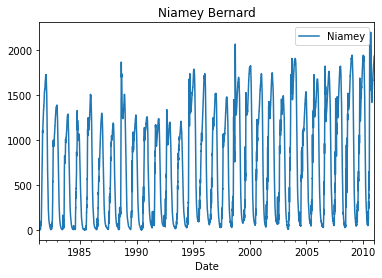

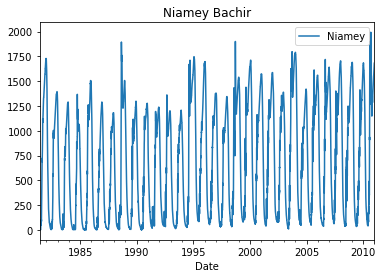

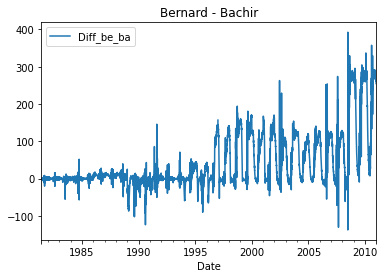

In [42]:
n_be.plot(x='Date', y='Niamey', title="Niamey Bernard")
n_ba.plot(x='Date', y='Niamey', title="Niamey Bachir")
n_be.plot(x='Date', y='Diff_be_ba', title="Bernard - Bachir")

# Missing data

## Ansongo

In [43]:
#check rows with missing data in Ansongo
md_a_ha = a_ha[a_ha['Ansongo'].isnull()]
print("We have {} missing days in {}.".format(len(md_a_ha),a_ha.columns[1]))

We have 381 missing days in Ansongo.


In [44]:
#save list indexes of missing data
id_md_a_ha = md_a_ha.index.values

In [45]:
#from @Andrej Kesely on stackoverflow
#function to drop indexes of consecutive numbers while keeping 
#only the extremes values of the consecutive serie
from itertools import groupby
def split_list(l):
    lst = l
    out = []
    for _, g in groupby(enumerate(lst), lambda k: k[0] - k[1]):
        g = list(g)
        out.append(g[0][1])
        if len(g) > 1:
            out.append(g[-1][1])
    return(out)

In [46]:
#slip consecutive indexes
sl_a_ha = split_list(id_md_a_ha)

In [47]:
#interpolation of missing values of Ansongo
inter_a_ha_start = a_ha[0:4500].interpolate()
inter_a_ha_middle = a_ha[4500:7000].interpolate(method='polynomial', order=2, limit_area='inside')
inter_a_ha_end = a_ha[7000:10806].interpolate()

#get Ansongo's hydrological interpolated serie
inter_a_ha = inter_a_ha_start.append(inter_a_ha_middle, ignore_index = True).append(inter_a_ha_end, ignore_index = True)

#make positive all the negative interpolated values
inter_a_ha['Ansongo'] = inter_a_ha['Ansongo'].apply(lambda x : x if x > 0 else x + 108.403808)

Index: 1368, Date: 1985-02-28 00:00:00 


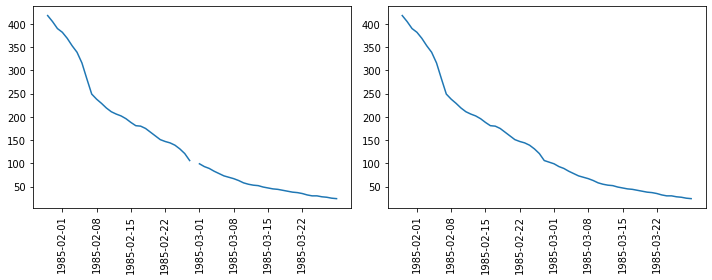

Index: 2829, Date: 1989-02-28 00:00:00 


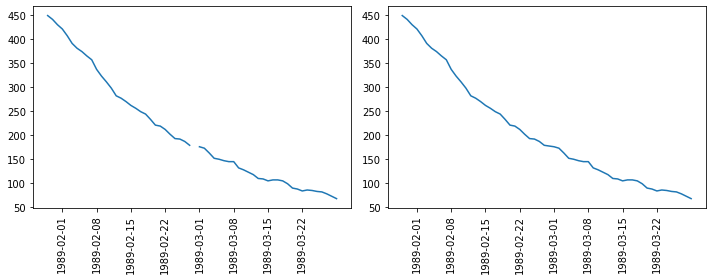

Index: 4290, Date: 1993-02-28 00:00:00 


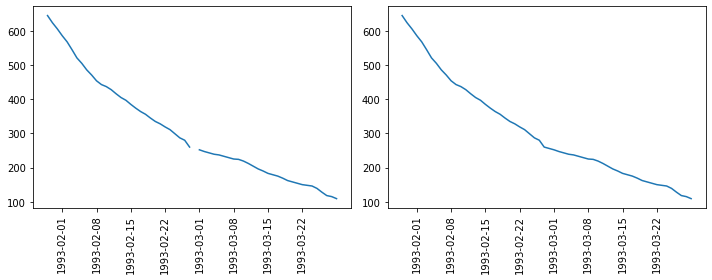

Index: 5414, Date: 1996-03-28 00:00:00 


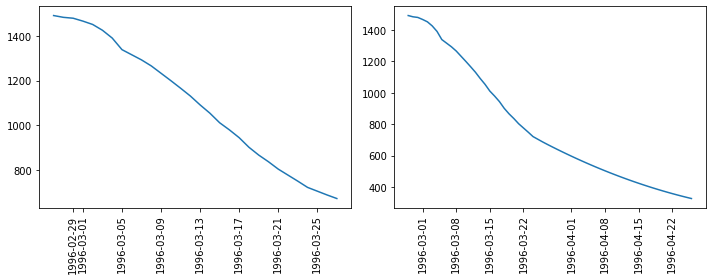

Index: 5570, Date: 1996-08-31 00:00:00 


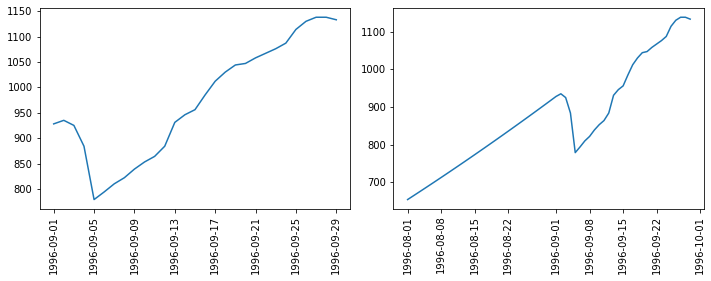

Index: 5751, Date: 1997-02-28 00:00:00 


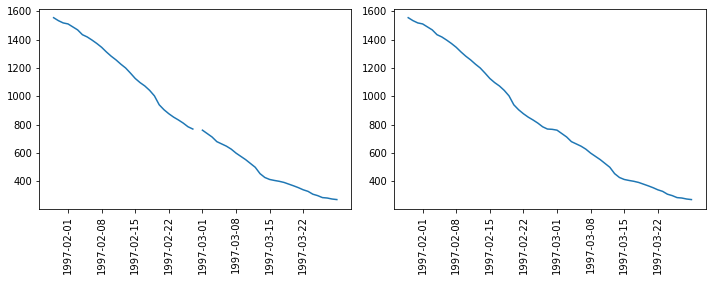

Index: 5844, Date: 1997-06-01 00:00:00 


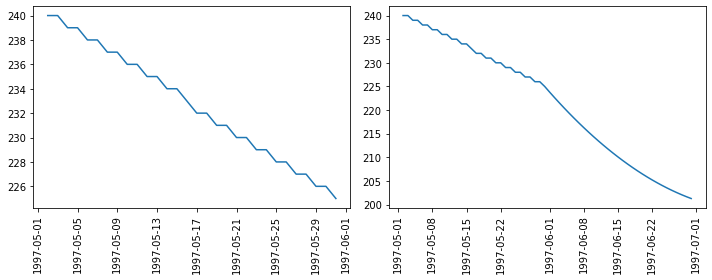

Index: 5892, Date: 1997-07-19 00:00:00 


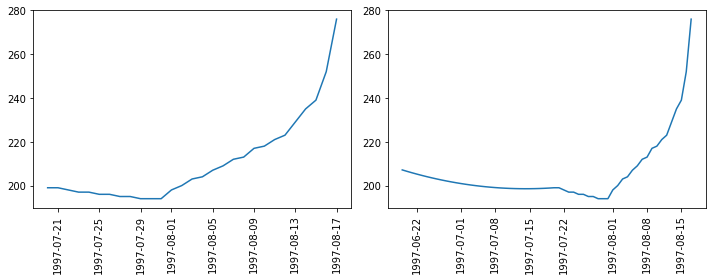

Index: 6116, Date: 1998-02-28 00:00:00 


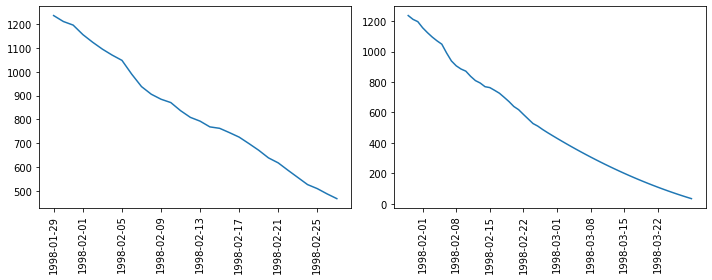

Index: 6283, Date: 1998-08-14 00:00:00 


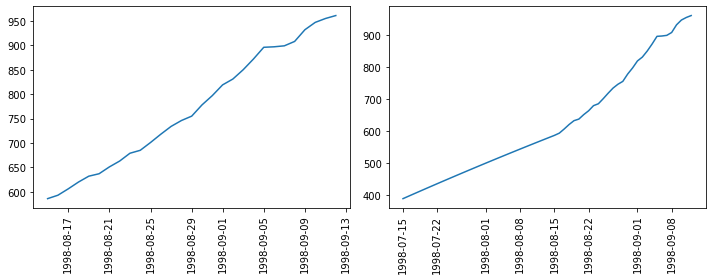

Index: 7212, Date: 2001-02-28 00:00:00 


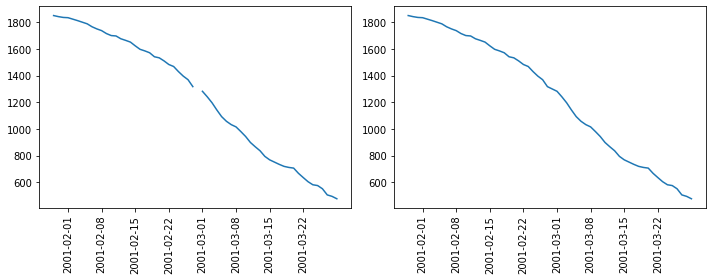

Index: 8673, Date: 2005-02-28 00:00:00 


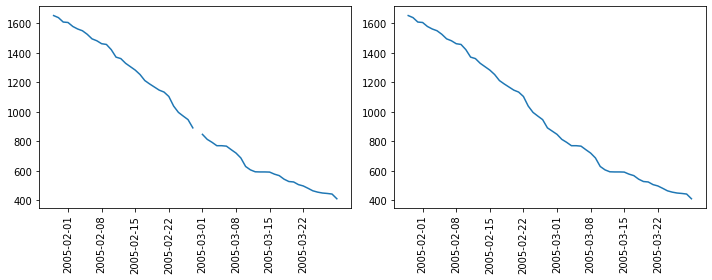

Index: 10134, Date: 2009-02-28 00:00:00 


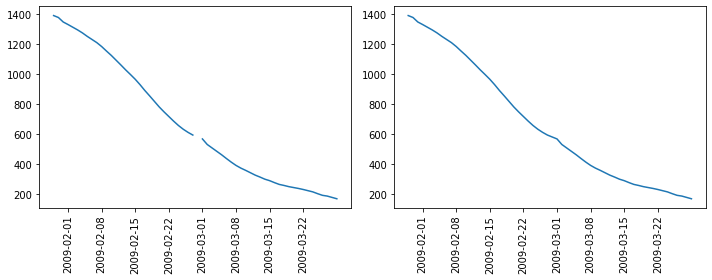

In [48]:
#plotting indexe with missing values
lenght = 30 #one month

for i in sl_a_ha:
    
    ilm = i - lenght
    ilp = i + lenght

    print("Index: {}, Date: {} ".format(i, md_a_ha.at[i,'Date']))

    x = a_ha.iloc[ilm:ilp]['Date']
    y = a_ha.iloc[ilm:ilp]['Ansongo']

    x_inter = inter_a_ha.iloc[ilm:ilp]['Date']
    y_inter = inter_a_ha.iloc[ilm:ilp]['Ansongo']

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(x, y)
    plt.xticks(rotation=90)
    
    plt.subplot(1, 2, 2)
    plt.plot(x_inter, y_inter)
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

<AxesSubplot:xlabel='Date'>

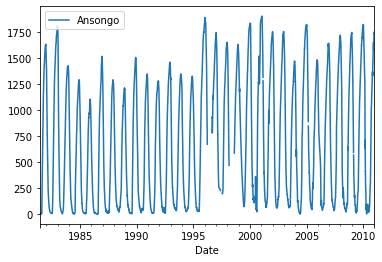

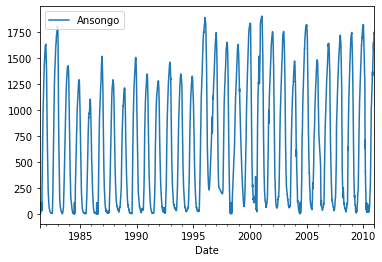

In [49]:
a_ha.plot(x='Date', y='Ansongo')
inter_a_ha.plot(x='Date', y='Ansongo')

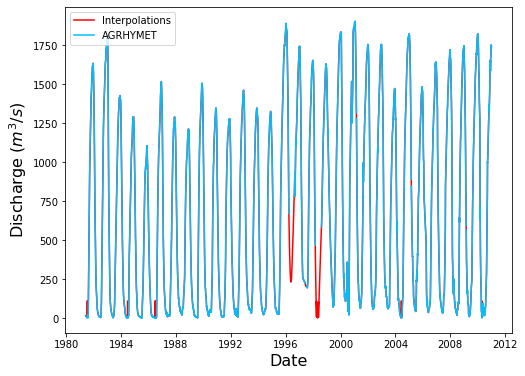

In [50]:
plt.figure(figsize=(8,6))
plt.plot(inter_a_ha['Date'], inter_a_ha['Ansongo'], label='Interpolations', color='red')
plt.plot(a_ha['Date'], a_ha['Ansongo'], label='AGRHYMET', color='deepskyblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge ($m^3/s$)', fontsize=16)
plt.legend()
#plt.savefig('../images/missing_data_ansongo.png')

## Kandadji

In [51]:
#remove bad series at the end of Hamatan's data of Kandadji and replace them by Bachir's
#select data of k_ha from 1981-01-01 to 2005-12-31 and k_ba from 2006-01-01 to 2010-12-31
k_start = k_ha.loc[(k_ha['Date'] >= start_date) & (k_ha['Date'] <= '2005-12-31')]
k_end = k_ba.loc[(k_ba['Date'] >= '2006-01-01') & (k_ba['Date'] <= end_date)]

In [52]:
#get Kandadji's hydrological serie
k = k_start.append(k_end, ignore_index = True)

In [53]:
#check rows with missing data in Kandadji
md_k = k[k['Kandadji'].isnull()]
print("We have {} missing days in {}.".format(len(md_k),k.columns[1]))

We have 50 missing days in Kandadji.


In [54]:
#save list indexes of missing data
id_md_k = md_k.index.values

In [55]:
#split consecutive indexes
sl_k = split_list(id_md_k)

In [56]:
#linear interpolation of missing values of Kandadji
inter_k = k.interpolate()

Index: 9090, Date: 2006-04-21 00:00:00 


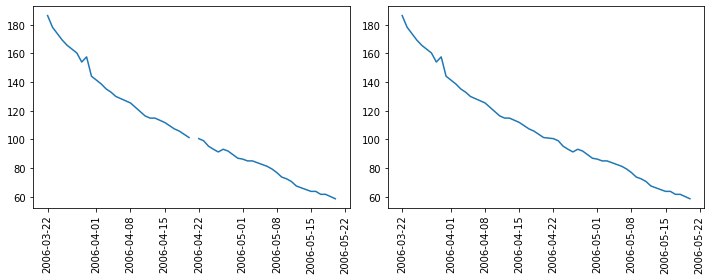

Index: 9122, Date: 2006-05-23 00:00:00 


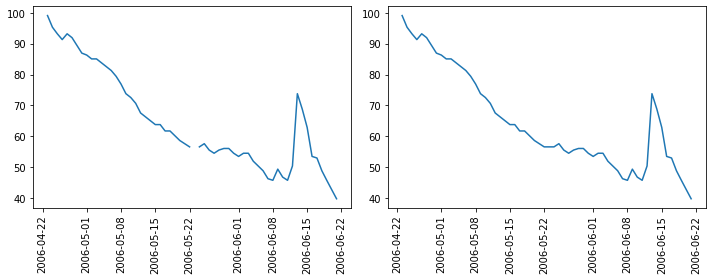

Index: 9207, Date: 2006-08-16 00:00:00 


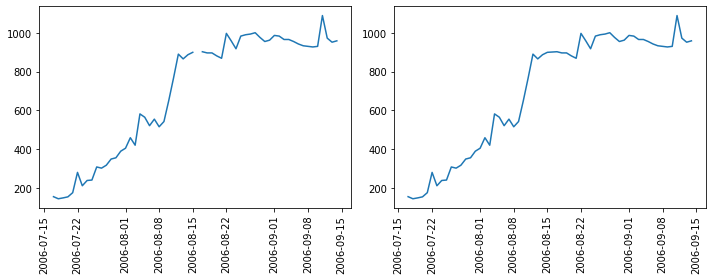

Index: 9239, Date: 2006-09-17 00:00:00 


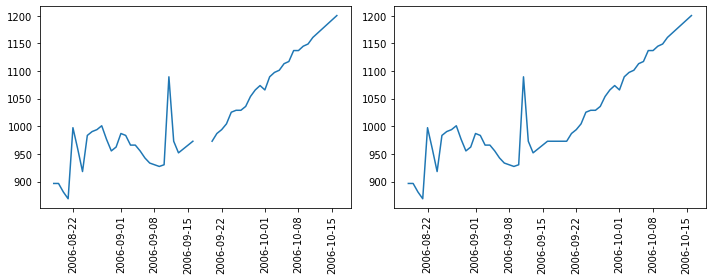

Index: 9241, Date: 2006-09-19 00:00:00 


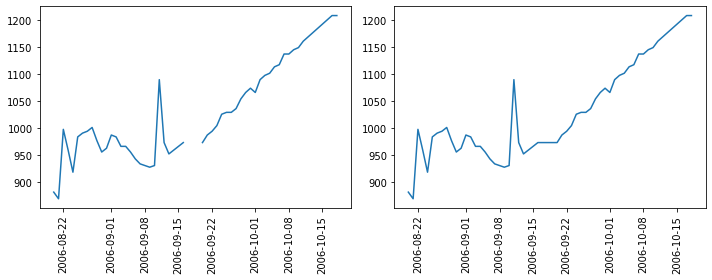

Index: 9281, Date: 2006-10-29 00:00:00 


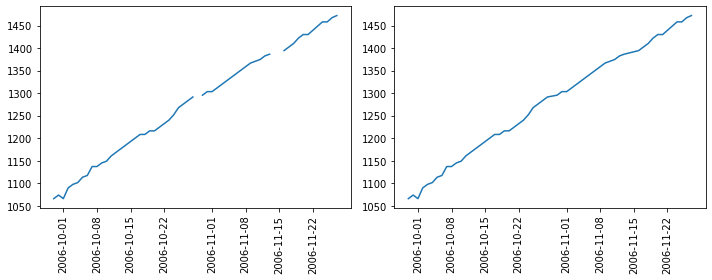

Index: 9297, Date: 2006-11-14 00:00:00 


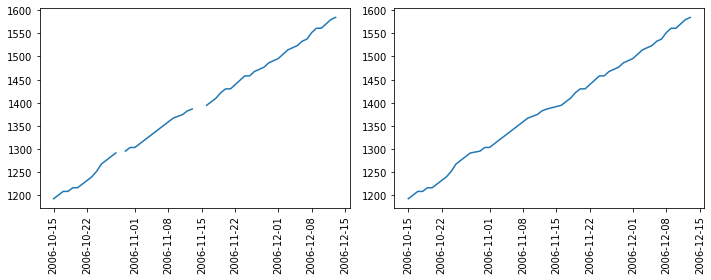

Index: 9298, Date: 2006-11-15 00:00:00 


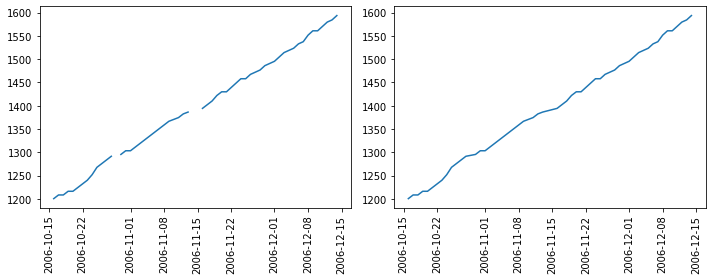

Index: 9328, Date: 2006-12-15 00:00:00 


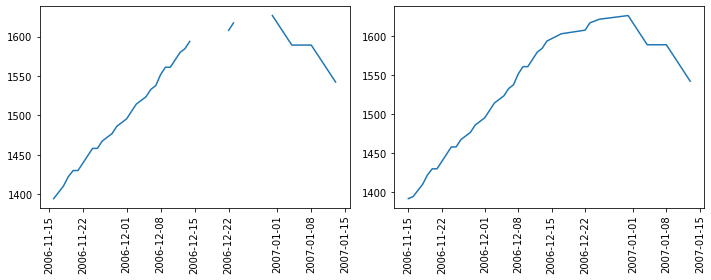

Index: 9329, Date: 2006-12-16 00:00:00 


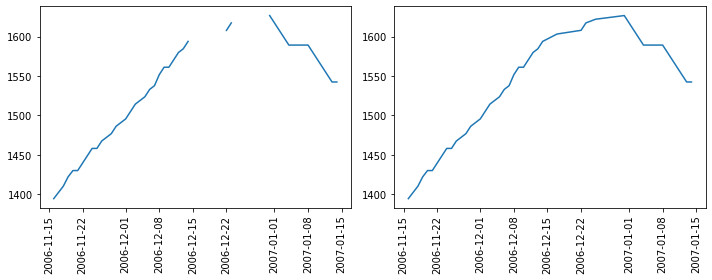

Index: 9331, Date: 2006-12-18 00:00:00 


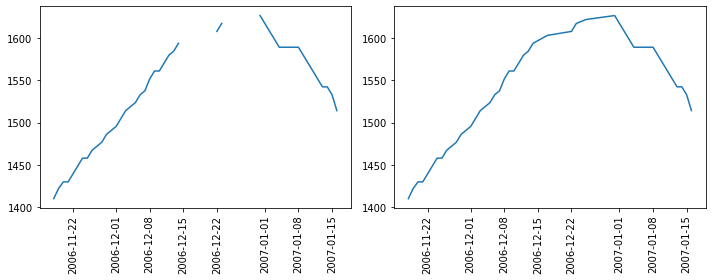

Index: 9334, Date: 2006-12-21 00:00:00 


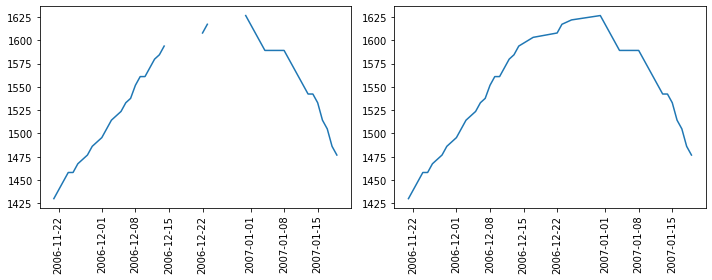

Index: 9337, Date: 2006-12-24 00:00:00 


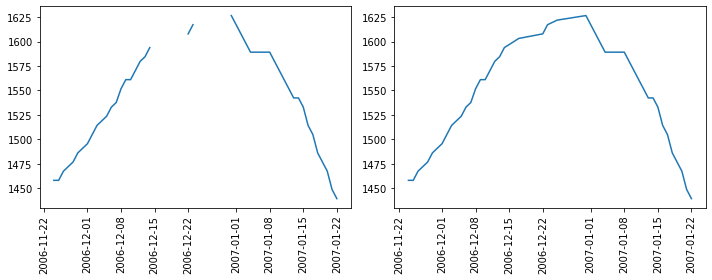

Index: 9339, Date: 2006-12-26 00:00:00 


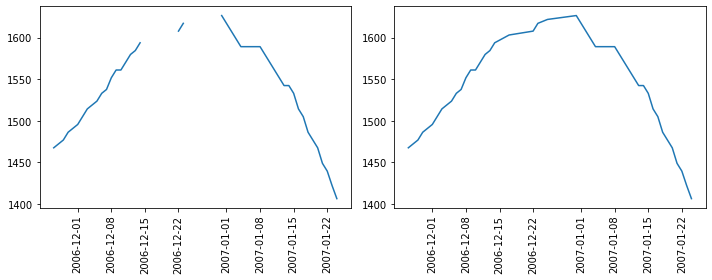

Index: 9343, Date: 2006-12-30 00:00:00 


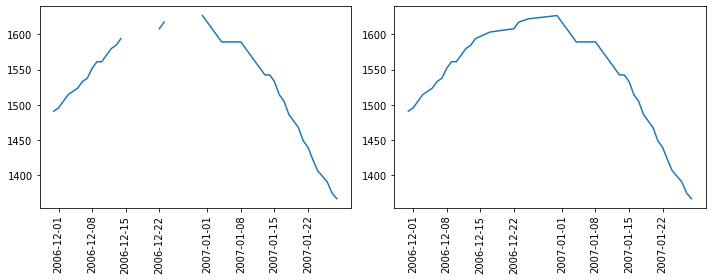

Index: 9892, Date: 2008-07-01 00:00:00 


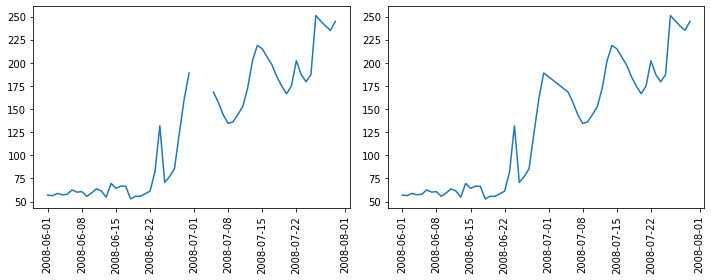

Index: 9895, Date: 2008-07-04 00:00:00 


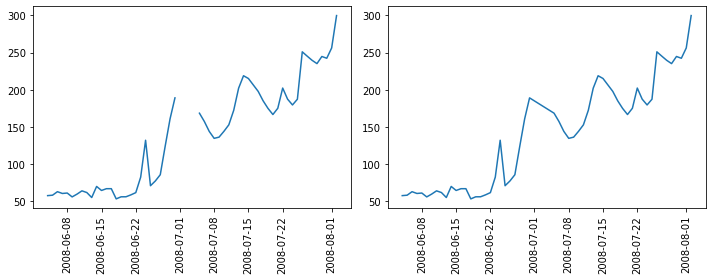

Index: 9999, Date: 2008-10-16 00:00:00 


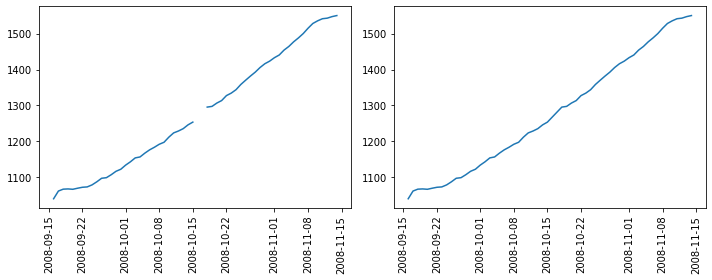

Index: 10000, Date: 2008-10-17 00:00:00 


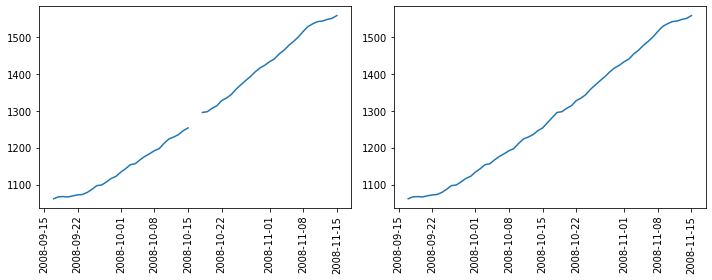

Index: 10183, Date: 2009-04-18 00:00:00 


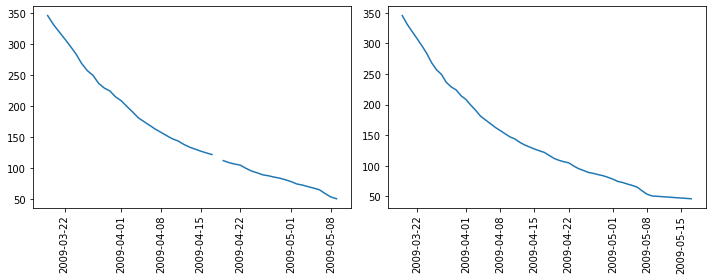

Index: 10205, Date: 2009-05-10 00:00:00 


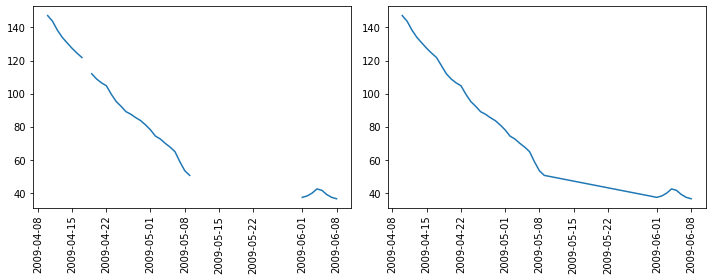

Index: 10226, Date: 2009-05-31 00:00:00 


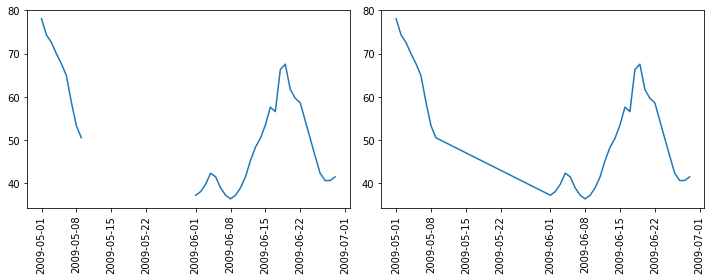

In [57]:
#plotting indexe with missing values
lenght = 30 #one month

for i in sl_k:
    
    ilm = i - lenght
    ilp = i + lenght
    
    print("Index: {}, Date: {} ".format(i, md_k.at[i,'Date']))
    
    x = k.iloc[ilm:ilp]['Date']
    y = k.iloc[ilm:ilp]['Kandadji']

    x_inter = inter_k.iloc[ilm:ilp]['Date']
    y_inter = inter_k.iloc[ilm:ilp]['Kandadji']

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(x, y)
    plt.xticks(rotation=90)
    
    plt.subplot(1, 2, 2)
    plt.plot(x_inter, y_inter)
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

<AxesSubplot:xlabel='Date'>

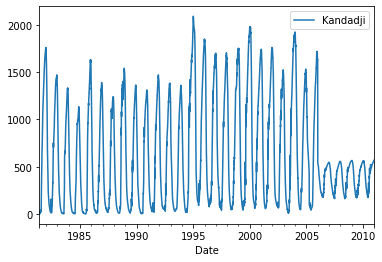

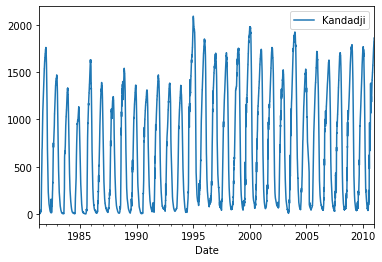

In [58]:
k_ha.plot(x='Date', y='Kandadji')
inter_k.plot(x='Date', y='Kandadji')

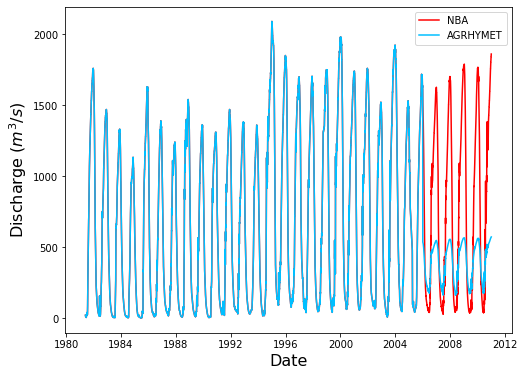

In [59]:
plt.figure(figsize=(8,6))
plt.plot(inter_k['Date'], inter_k['Kandadji'], label='NBA', color='red')
plt.plot(k_ha['Date'], k_ha['Kandadji'], label='AGRHYMET', color='deepskyblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge ($m^3/s$)', fontsize=16)
plt.legend()
#plt.savefig('../images/missing_data_kandadji.png')

## Niamey

In [60]:
#check rows with missing data in Niamey
md_n_ha = n_ha[n_ha['Niamey'].isnull()]
print("We have {} missing days in {}.".format(len(md_n_ha),n_ha.columns[1]))

We have 8 missing days in Niamey.


In [61]:
#save list indexes of missing data
id_md_n_ha = md_n_ha.index.values

In [62]:
#split consecutive indexes
sl_n_ha = split_list(id_md_n_ha)

In [63]:
#linear interpolation of missing values of Niamey
inter_n_ha = n_ha.interpolate()

Index: 1003, Date: 1984-02-29 00:00:00 


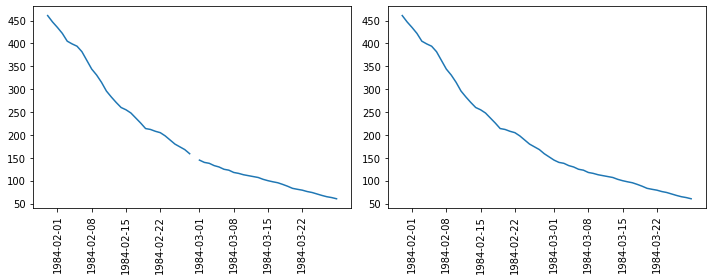

Index: 2464, Date: 1988-02-29 00:00:00 


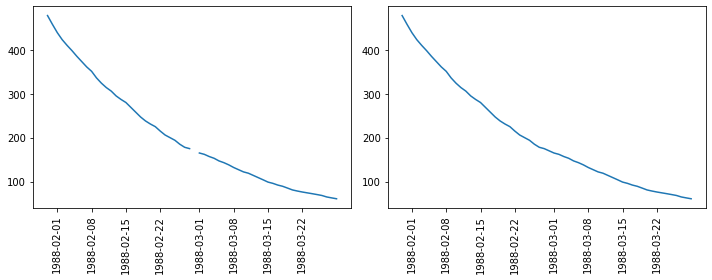

Index: 3925, Date: 1992-02-29 00:00:00 


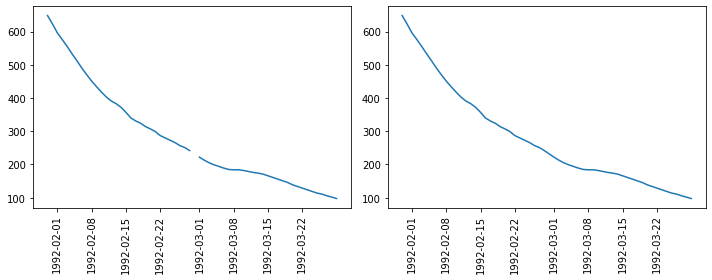

Index: 5386, Date: 1996-02-29 00:00:00 


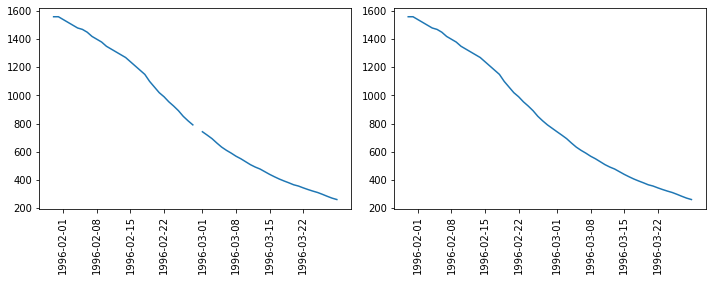

Index: 6847, Date: 2000-02-29 00:00:00 


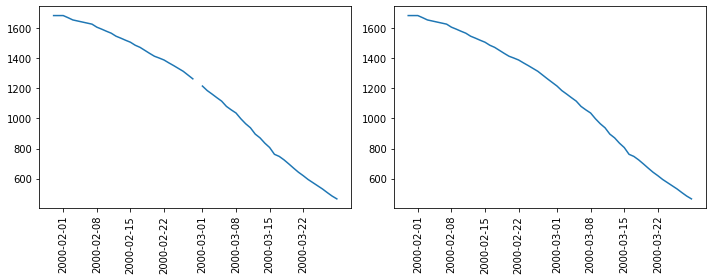

Index: 7430, Date: 2001-10-04 00:00:00 


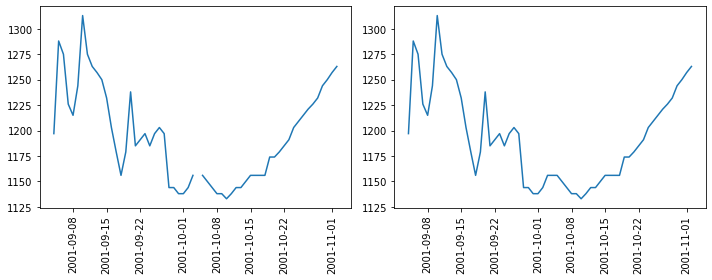

Index: 8308, Date: 2004-02-29 00:00:00 


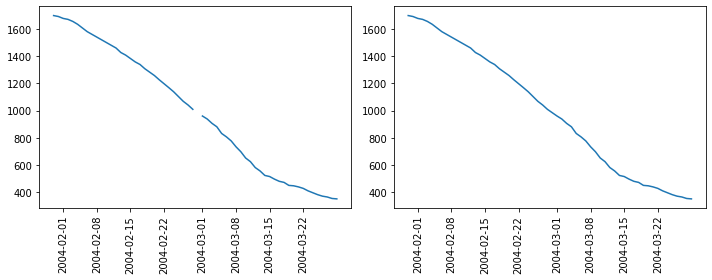

Index: 9769, Date: 2008-02-29 00:00:00 


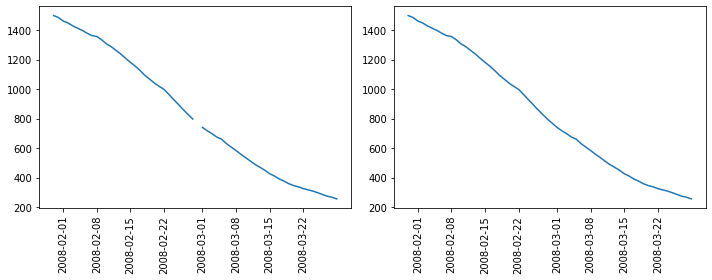

In [64]:
#plotting indexe with missing values
lenght = 30 #one month

for i in sl_n_ha:
    
    ilm = i - lenght
    ilp = i + lenght
    
    print("Index: {}, Date: {} ".format(i, md_n_ha.at[i,'Date']))
    
    x = n_ha.iloc[ilm:ilp]['Date']
    y = n_ha.iloc[ilm:ilp]['Niamey']
    
    x_inter = inter_n_ha.iloc[ilm:ilp]['Date']
    y_inter = inter_n_ha.iloc[ilm:ilp]['Niamey']

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(x, y)
    plt.xticks(rotation=90)
    
    plt.subplot(1, 2, 2)
    plt.plot(x_inter, y_inter)
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

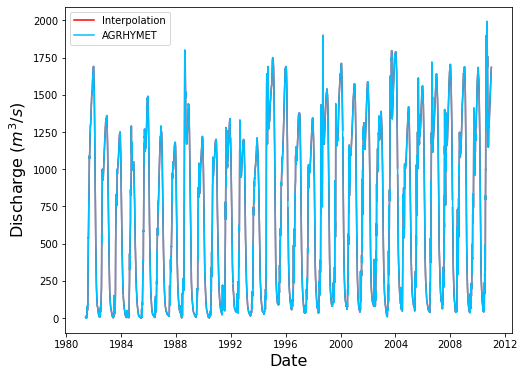

In [65]:
plt.figure(figsize=(8,6))
plt.plot(n_ha['Date'], n_ha['Niamey'], label='Interpolation', color='red')
plt.plot(inter_n_ha['Date'], inter_n_ha['Niamey'], label='AGRHYMET', color='deepskyblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Discharge ($m^3/s$)', fontsize=16)
plt.legend()
#plt.savefig('../images/missing_data_niamey.png')

## Wrap up and save hydro data

<AxesSubplot:xlabel='Date'>

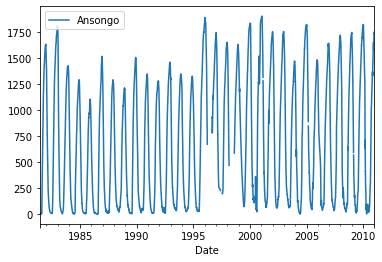

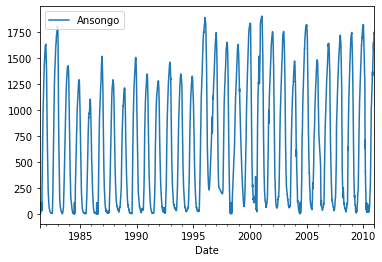

In [66]:
a_ha.plot(x='Date', y='Ansongo')
inter_a_ha.plot(x='Date', y='Ansongo')

In [67]:
#save data to csv
inter_a_ha = inter_a_ha[['Date', 'Ansongo']]
#inter_a_ha.to_csv('./hydro_data/interpolate/ansongo.csv', index=False)

<AxesSubplot:xlabel='Date'>

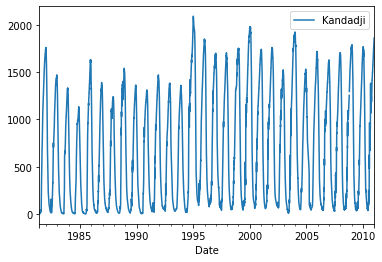

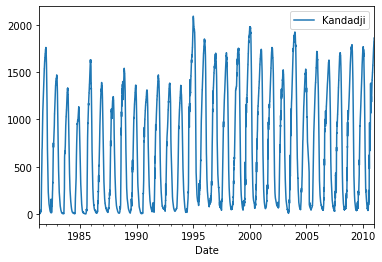

In [68]:
k.plot(x='Date', y='Kandadji')
inter_k.plot(x='Date', y='Kandadji')

In [69]:
#save data to csv
inter_k = inter_k[['Date', 'Kandadji']]
#inter_k.to_csv('./hydro_data/interpolate/kandadji.csv', index=False)

<AxesSubplot:xlabel='Date'>

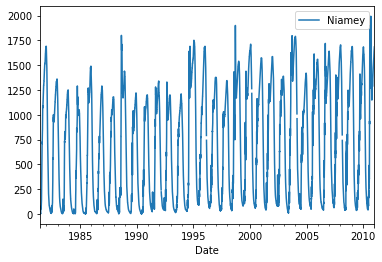

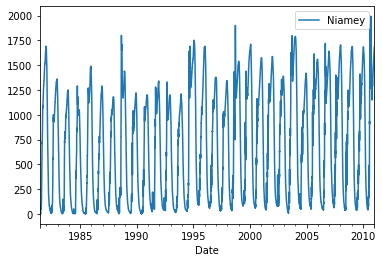

In [70]:
n_ha.plot(x='Date', y='Niamey')
inter_n_ha.plot(x='Date', y='Niamey')

In [71]:
#save data to csv
inter_n_ha = inter_n_ha[['Date', 'Niamey']]
#inter_n_ha.to_csv('./hydro_data/interpolate/niamey.csv', index=False)